In [1]:
using JLD2
using Plots
using StatsBase
using LaTeXStrings
using Glob

In [2]:
data1 = jldopen("../data_archive/q_0p10_data/collated_results.jld2")["results"]
data2 = jldopen("../data_archive/no_unitary/collated_results.jld2")["results"]
data3 = jldopen("../data_archive/unlabeled_unitary/collated_results.jld2")["results"]
data4 = jldopen("../data_archive/data_gaps_and_some_coherent/collated_results.jld2")["results"];

In [260]:
data5 = jldopen("../output/collated_results.jld2")["results"];

JLDFile /Users/jhauser/Code/2025_ZZX_TNs/output/sample_L4_T4_lambda0p100_delta0p100_q0p000_theta0p100_puretrue_PBC_20250825_003358_3160480542.jld2 (read-only)
 ├─🔢 L
 ├─🔢 T
 ├─🔢 lambda
 ├─🔢 delta
 ├─🔢 q
 ├─🔢 theta
 ├─🔢 pure
 ├─🔢 samples
 ├─🔢 obs
 └─ ⋯ (3 more entries)

In [195]:
temp["mean_data"][:terminal_order]

10-element Vector{ComplexF64}:
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
 2.9919554679578004 + 9.948619166931594e-18im
  2.344565769870156 - 7.886067906025714e-19im
 2.2780771611305015 + 8.31247757861524e-18im
 3.9999999999999996 + 2.4585806496582844e-17im

In [196]:
temp["mean_data"][:terminal_disorder]

10-element Vector{ComplexF64}:
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
 1.081052071156109 - 2.4375873543216426e-17im
 1.079444497187214 + 3.9832583761508043e-19im
 1.250656514169441 + 4.991835264705879e-17im
               1.0 + 1.6557827129593017e-63im

In [3]:
typeof(data1)

Dict{NTuple{5, Any}, Tuple{Dict{Symbol, Vector{Float64}}, Dict{Symbol, Vector{Float64}}, Int64, Vector{Symbol}, Float64}}

In [261]:
no_unitary_data = Dict{Tuple{Int,Int,Float64,Float64,Float64,Bool},Tuple{Dict{Symbol, Vector{ComplexF64}}, Dict{Symbol, Vector{ComplexF64}}, Int64, Vector{Symbol}, Float64}}()
for key in keys(data1)
    L, T, λ, δ, q = key
    new_key = (L, T, λ, δ, q, false)
    if haskey(no_unitary_data, new_key)
        E1, E2, samples, obs, t = no_unitary_data[new_key]
        new_E1, new_E2, new_samples, new_obs, new_t = data1[key]
        @assert obs == new_obs

        for ob in obs
            E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
            E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
        end
        no_unitary_data[new_key] = (E1, E2, samples + new_samples, obs, t + new_t)
    else
        no_unitary_data[new_key] = data1[key]
    end
end

for key in keys(data2)
    L, T, λ, δ, q = key
    new_key = (L, T, λ, δ, q, false)
    if haskey(no_unitary_data, new_key)
        E1, E2, samples, obs, t = no_unitary_data[new_key]
        new_E1, new_E2, new_samples, new_obs, new_t = data2[key]
        @assert obs == new_obs
        for ob in obs
            E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
            E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
        end
        no_unitary_data[new_key] = (E1, E2, samples + new_samples, obs, t + new_t)
    else
        no_unitary_data[new_key] = data2[key]
    end
end

for key in keys(data4)
    L, T, λ, δ, q, θ, pure = key
    if θ > 0.0
        continue
    end
   
    new_key = (L, T, λ, δ, q, pure)
    if haskey(no_unitary_data, new_key)
        E1, E2, samples, obs, t = no_unitary_data[new_key]
        new_E1, new_E2, new_samples, new_obs, new_t = data4[key]
        @assert obs == new_obs
        for ob in obs
            E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
            E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
        end
        no_unitary_data[new_key] = (E1, E2, samples + new_samples, obs, t + new_t)
    else
        no_unitary_data[new_key] = data4[key]
    end
end

for key in keys(data5)
    L, T, λ, δ, q, θ, pure = key
    if θ > 0.0
        continue
    end
   
    new_key = (L, T, λ, δ, q, pure)
    if haskey(no_unitary_data, new_key)
        E1, E2, samples, obs, t = no_unitary_data[new_key]
        new_E1, new_E2, new_samples, new_obs, new_t = data5[key]
        @assert obs == new_obs
        for ob in obs
            E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
            E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
        end
        no_unitary_data[new_key] = (E1, E2, samples + new_samples, obs, t + new_t)
    else
        no_unitary_data[new_key] = data5[key]
    end
end

In [262]:
unitary_data = Dict{Tuple{Int,Int,Float64,Float64,Float64,Float64,Bool},Tuple{Dict{Symbol, Vector{ComplexF64}}, Dict{Symbol, Vector{ComplexF64}}, Int64, Vector{Symbol}, Float64}}()
# for key in keys(data3)
#     L, T, λ, δ, q, θ, pure = key
#     if θ == 0.0
#         continue
#     end
#     if haskey(unitary_data, key)
#         E1, E2, samples, obs, t = unitary_data[key]
#         new_E1, new_E2, new_samples, new_obs, new_t = data3[key]
#         println(new_samples)
#         @assert obs == new_obs

#         for ob in obs
#             E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
#             E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
#         end
#         unitary_data[key] = (E1, E2, samples + new_samples, obs, t + new_t)
#     else
#         unitary_data[key] = data3[key]
#         println(data3[key][3])
#     end
# end

# for key in keys(data4)
#     L, T, λ, δ, q, θ, pure = key
#     if θ == 0.0
#         continue
#     end
   
#     if haskey(unitary_data, key)
#         E1, E2, samples, obs, t = unitary_data[key]
#         new_E1, new_E2, new_samples, new_obs, new_t = data4[key]
#         @assert obs == new_obs
#         for ob in obs
#             E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
#             E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
#         end
#         unitary_data[key] = (E1, E2, samples + new_samples, obs, t + new_t)
#     else
#         unitary_data[key] = data4[key]
#     end
# end

for key in keys(data5)
    L, T, λ, δ, q, θ, pure = key
    if θ == 0.0
        continue
    end
   
    if haskey(unitary_data, key)
        E1, E2, samples, obs, t = unitary_data[key]
        new_E1, new_E2, new_samples, new_obs, new_t = data5[key]
        @assert obs == new_obs
        for ob in obs
            E1[ob] = (E1[ob] * samples + new_E1[ob] * new_samples)/(samples + new_samples)
            E2[ob] = (E2[ob] * samples + new_E2[ob] * new_samples)/(samples + new_samples)
        end
        unitary_data[key] = (E1, E2, samples + new_samples, obs, t + new_t)
    else
        unitary_data[key] = data5[key]
    end
end

In [264]:
data5

Dict{NTuple{7, Any}, Tuple{Dict{Symbol, Vector{ComplexF64}}, Dict{Symbol, Vector{ComplexF64}}, Int64, Vector{Symbol}, Float64}} with 512 entries:
  (16, 34, 0.24, 0.7, 0.1, 0.0, false) => (Dict(:κEA=>[16.0+0.0im, 16.0+0.0im, …
  (16, 34, 0.0, 0.7, 0.0, 0.2, true)   => (Dict(:pure_κEA=>[16.0+0.0im, 16.0+0.…
  (16, 34, 0.9, 0.7, 0.1, 0.1, false)  => (Dict(:κEA=>[16.0+0.0im, 16.0+0.0im, …
  (16, 34, 0.59, 0.7, 0.0, 0.0, true)  => (Dict(:pure_κEA=>[16.0+0.0im, 16.0+0.…
  (24, 50, 0.5, 0.7, 0.0, 0.2, true)   => (Dict(:pure_κEA=>[24.0+0.0im, 24.0+0.…
  (24, 50, 0.52, 0.7, 0.0, 0.0, true)  => (Dict(:pure_κEA=>[24.0+0.0im, 24.0+0.…
  (32, 66, 0.8, 0.7, 0.1, 0.2, false)  => (Dict(:κEA=>[32.0+0.0im, 32.0+0.0im, …
  (16, 34, 0.3, 0.7, 0.0, 0.1, true)   => (Dict(:pure_κEA=>[16.0+0.0im, 16.0+0.…
  (32, 66, 0.7, 0.7, 0.1, 0.1, false)  => (Dict(:κEA=>[32.0+0.0im, 32.0+0.0im, …
  (32, 66, 0.8, 0.7, 0.15, 0.2, false) => (Dict(:κEA=>[32.0+0.0im, 32.0+0.0im, …
  (32, 66, 0.21, 0.7, 0.1, 0.0, false) => (D

In [244]:
[key for key in keys(data5) if key[1] == 24 && key[3] == 0.4]

5-element Vector{Tuple{Int64, Int64, Float64, Float64, Float64, Float64, Bool}}:
 (24, 50, 0.4, 0.7, 0.0, 0.2, 1)
 (24, 50, 0.4, 0.7, 0.05, 0.1, 0)
 (24, 50, 0.4, 0.7, 0.1, 0.1, 0)
 (24, 50, 0.4, 0.7, 0.1, 0.2, 0)
 (24, 50, 0.4, 0.7, 0.0, 0.1, 1)

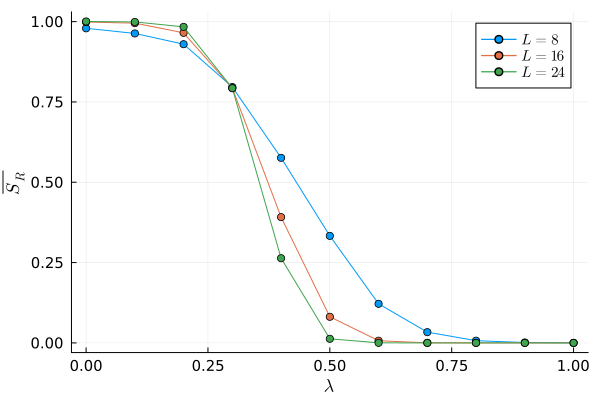

In [259]:
q = 0.05
δ = 0.7
θ = 0.1
pure = false
plt = plot()
for L in 8:8:24
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([unitary_data[(L,T,λ,δ,q,θ, pure)][1][:Ic][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}", #title="r=$r",
    # framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

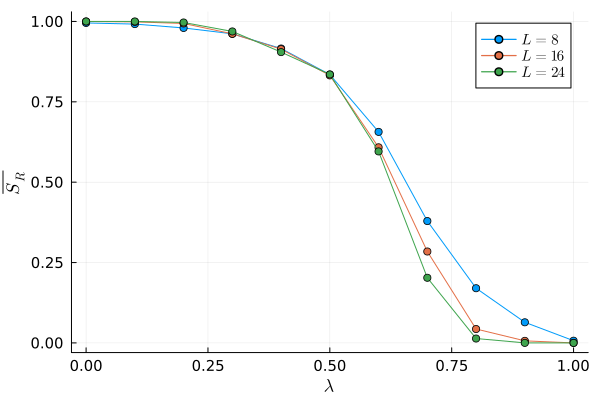

In [257]:
q = 0.0
δ = 0.7
θ = 0.2
pure = true
plt = plot()
for L in 8:8:24
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([unitary_data[(L,T,λ,δ,q,θ, pure)][1][:pure_SR][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}", #title="r=$r",
    # framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

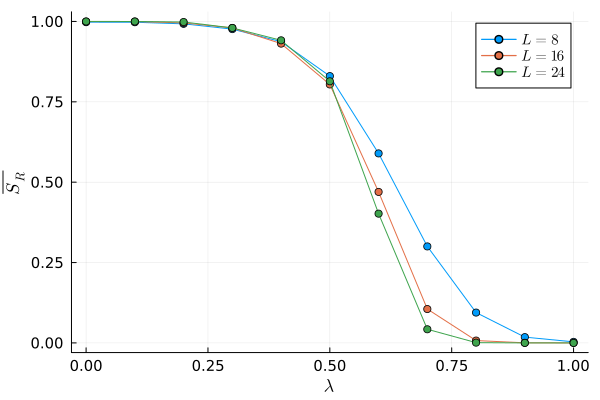

In [251]:
q = 0.0
δ = 0.7
θ = 0.1
pure = true
plt = plot()
for L in 8:8:24
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([unitary_data[(L,T,λ,δ,q,θ, pure)][1][:pure_SR][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}", #title="r=$r",
    # framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

In [271]:
data5[(8,18,0.4,0.7,0.0,0.0,true)][3]

1000

In [89]:
[key for key in keys(no_unitary_data) if key[3]==0.0 && key[1] == 24]

11-element Vector{Tuple{Int64, Int64, Float64, Float64, Float64, Bool}}:
 (24, 50, 0.0, 0.7, 0.35, 0)
 (24, 50, 0.0, 0.7, 0.2, 0)
 (24, 50, 0.0, 0.7, 0.4, 0)
 (24, 50, 0.0, 0.7, 0.0, 0)
 (24, 50, 0.0, 0.7, 0.3, 0)
 (24, 50, 0.0, 0.7, 0.5, 0)
 (24, 50, 0.0, 0.7, 0.05, 0)
 (24, 50, 0.0, 0.7, 0.1, 0)
 (24, 50, 0.0, 0.7, 0.15, 0)
 (24, 50, 0.0, 0.7, 0.45, 0)
 (24, 50, 0.0, 0.7, 0.25, 0)

In [267]:
q = 0.0
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([data5[(L,T,λ,δ,q,0.0,true)][1][:terminal_order][2L+1] for λ in λs])
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (5:5:30, [L"5", L"10", L"15", L"20", L"25", L"30"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{\kappa_{EA}}", #title="r=$r",
    # framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

KeyError: KeyError: key :terminal_order not found

# Main Data

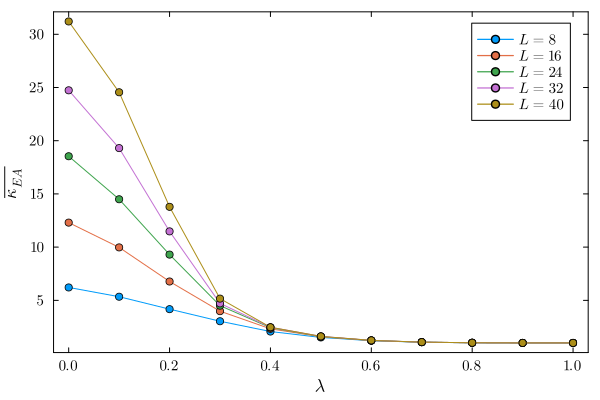

In [167]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:κEA][2L+1] for λ in λs])
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (5:5:30, [L"5", L"10", L"15", L"20", L"25", L"30"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{\kappa_{EA}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

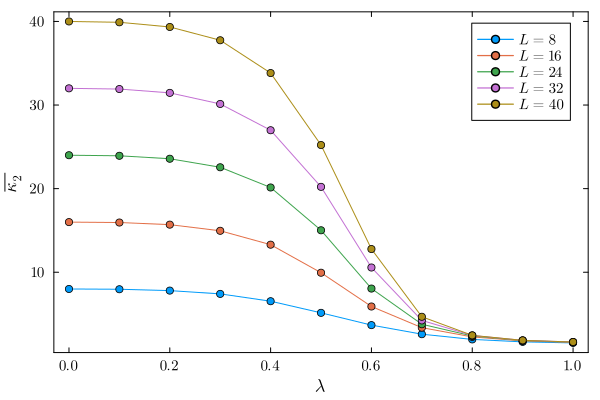

In [168]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:κ2][2L+1] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (10:10:40, [L"10", L"20", L"30", L"40"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{\kappa_{2}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

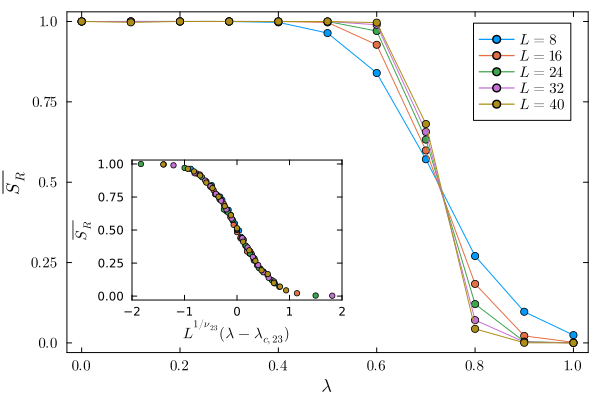

In [ ]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:SR][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end

plot!(plt,inset=bbox(0.22,0.4,0.35,0.35), subplot=2, )

ν = 1.5
λc = 0.72

# plt = plot()
for L in 8:8:40
    T = 2L+2
    λs = union(0.5:0.1:0.6,0.64:0.01:0.8, 0.9:0.1:0.9)
    xs = (λs .- λc) * L^(1/ν)
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:SR][2L+1] for λ in λs])
    # xticks = (-4:2:2, [L"-4", L"-2", L"0", L"2"])
    # yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=3, label=L"L=%$L", xlabel=L"L^{1/\nu_{23}}(\lambda-\lambda_{c,23})", ylabel=L"\overline{S_R}", # title="r=$r",
    framestyle=:box, #xticks=xticks, yticks=yticks,
    subplot=2, grid=false, legend=false, xlim=(-2,2),
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end

savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

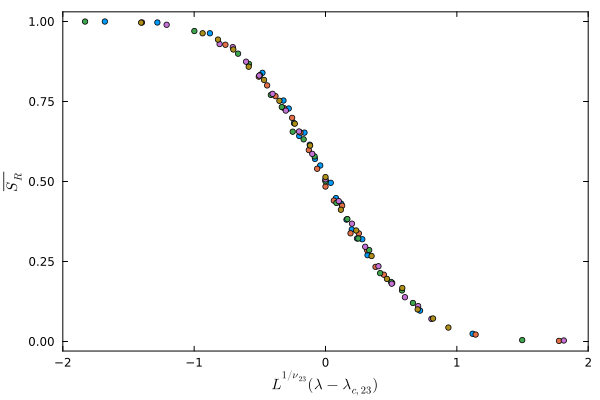

In [224]:

ν = 1.5
λc = 0.72

plt = plot()
for L in 8:8:40
    T = 2L+2
    λs = union(0.0:0.1:0.6,0.64:0.01:0.8, 0.9:0.1:1.0)
    xs = (λs .- λc) * L^(1/ν)
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:SR][2L+1] for λ in λs])
    # xticks = (-4:2:2, [L"-4", L"-2", L"0", L"2"])
    # yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=3, label=L"L=%$L", xlabel=L"L^{1/\nu_{23}}(\lambda-\lambda_{c,23})", ylabel=L"\overline{S_R}", # title="r=$r",
    framestyle=:box, #xticks=xticks, yticks=yticks,
     grid=false, legend=false, xlim=(-2,2),
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end
plt

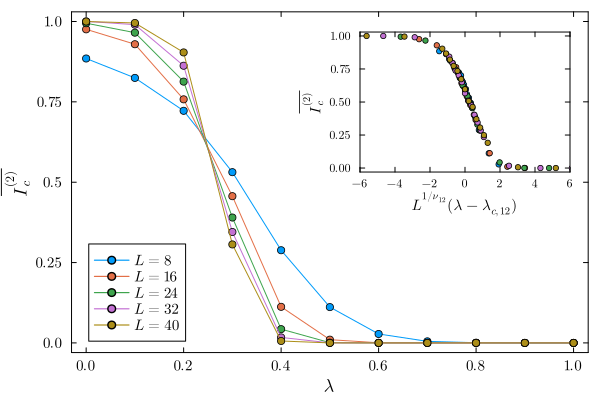

In [356]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:Ic][2L+1] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{I_c^{(2)}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false, legend=:bottomleft,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end

plot!(plt,inset=bbox(0.6,0.08,0.35,0.35), subplot=2, )

ν = 1.2
λc = 0.26
for L in 8:8:40
    T = 2L+2
    λs = union(0.0:0.1:0.6,0.21:0.01:0.32)
    xs = (λs .- λc) * L^(1/ν)
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:Ic][2L+1] for λ in λs])
    xticks = (-6:2:6, [L"-6", L"-4", L"-2", L"0", L"2", L"4", L"6"])
    yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=3, label=L"L=%$L", xlabel=L"L^{1/\nu_{12}}(\lambda-\lambda_{c,12})", ylabel=L"\overline{I_c^{(2)}}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks,
    subplot=2, grid=false, legend=false, xlim=(-6,6),
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end

# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

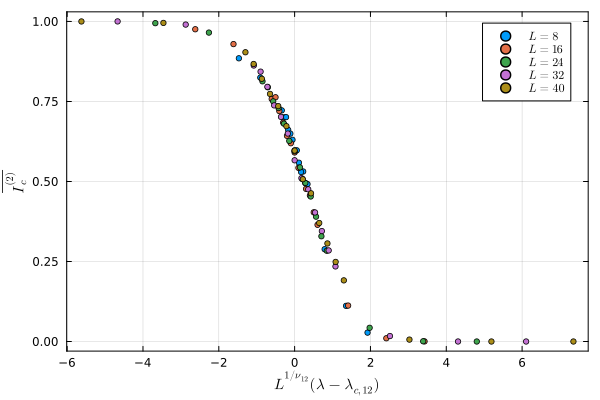

In [351]:

ν = 1.2
λc = 0.26

plt = plot()
for L in 8:8:40
    T = 2L+2
    λs = union(0.0:0.1:0.6,0.21:0.01:0.32)
    xs = (λs .- λc) * L^(1/ν)
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:Ic][2L+1] for λ in λs])
    # xticks = (-4:2:2, [L"-4", L"-2", L"0", L"2"])
    # yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=3, label=L"L=%$L", xlabel=L"L^{1/\nu_{12}}(\lambda-\lambda_{c,12})", ylabel=L"\overline{I_c^{(2)}}", # title="r=$r",
    framestyle=:box, #xticks=xticks, yticks=yticks,
    #  grid=false, legend=false, xlim=(-6,6),
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end
plt

# Appendix Data

## classical transitions

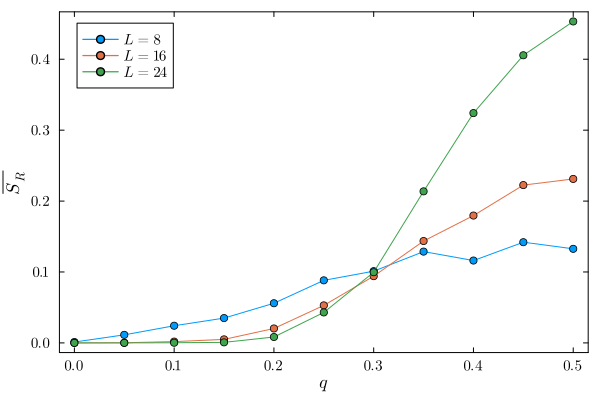

In [164]:
λ = 1.0
δ = 0.7
θ = 0.0
pure = false
plt = plot()
for L in 8:8:24
    T = 2L + 2
    qs = 0.0:0.05:0.5
    ys = real.([no_unitary_data[(L,T,λ,δ,q, pure)][1][:SR][2L+1] for q in qs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.1:0.5, [L"0.0", L"0.1", L"0.2", L"0.3", L"0.4", L"0.5"])
    yticks = (0.0:0.1:0.4, [L"0.0", L"0.1", L"0.2", L"0.3", L"0.4"])
    plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\overline{S_R}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

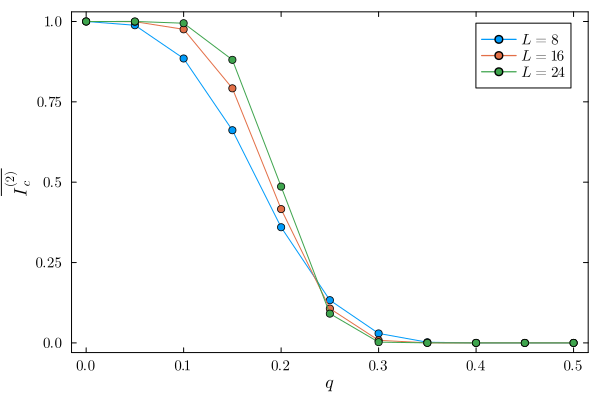

In [166]:
λ = 0.0
δ = 0.7
θ = 0.0
pure = false
plt = plot()
for L in 8:8:24
    T = 2L + 2
    qs = 0.0:0.05:0.5
    ys = real.([no_unitary_data[(L,T,λ,δ,q, pure)][1][:Ic][2L+1] for q in qs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
     xticks = (0.0:0.1:0.5, [L"0.0", L"0.1", L"0.2", L"0.3", L"0.4", L"0.5"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\overline{I_c^{(2)}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

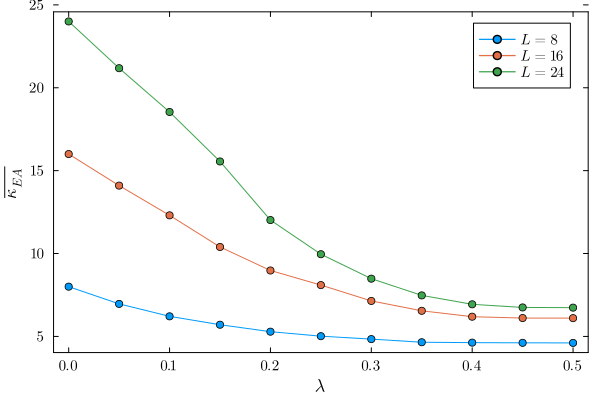

In [186]:
λ = 0.0
δ = 0.7
plt = plot()
for L in 8:8:24
    T = 2L + 2
    qs = 0.0:0.05:0.5
    ys = real.([no_unitary_data[(L,T,λ,δ,q, false)][1][:κEA][2L+1] for q in qs])
     xticks = (0.0:0.1:0.5, [L"0.0", L"0.1", L"0.2", L"0.3", L"0.4", L"0.5"])
    yticks = (5:5:30, [L"5", L"10", L"15", L"20", L"25", L"30"])
    plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{\kappa_{EA}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

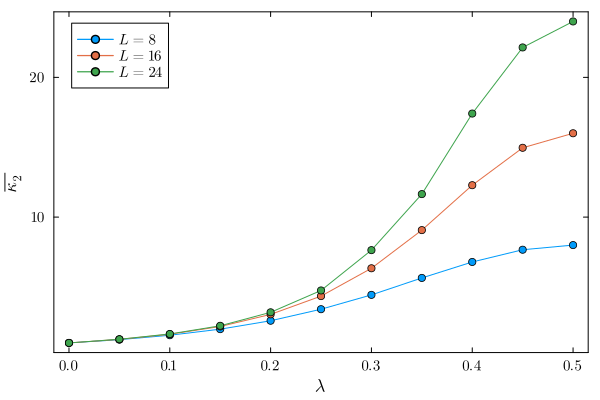

In [187]:
λ = 1.0
δ = 0.7
plt = plot()
for L in 8:8:24
    T = 2L + 2
    qs = 0.0:0.05:0.5
    ys = real.([no_unitary_data[(L,T,λ,δ,q, false)][1][:κ2][2L+1] for q in qs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
     xticks = (0.0:0.1:0.5, [L"0.0", L"0.1", L"0.2", L"0.3", L"0.4", L"0.5"])
    yticks = (10:10:40, [L"10", L"20", L"30", L"40"])
    plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{\kappa_{2}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

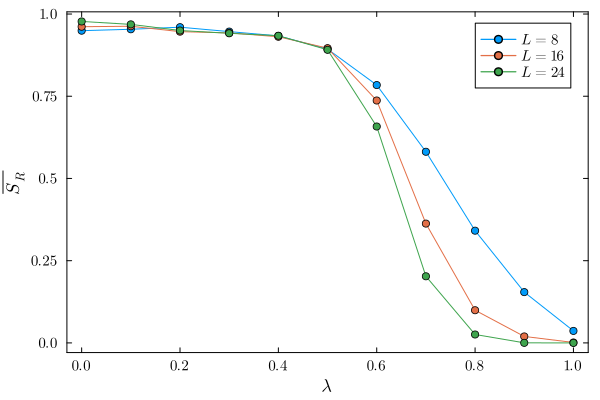

In [82]:
q = 0.0
δ = 0.7
θ = 0.2
pure = true
plt = plot()
for L in 8:8:24
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([unitary_data[(L,T,λ,δ,q,θ, pure)][1][:pure_SR][L+2] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

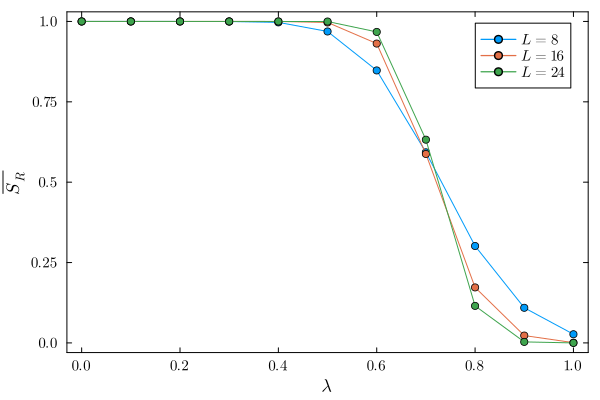

In [ ]:
q = 0.0
δ = 0.7
θ = 0.1
pure = false
plt = plot()
for L in 8:8:24
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([unitary_data[(L,T,λ,δ,q,θ, pure)][1][:SR][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

In [57]:
data4

Dict{NTuple{7, Any}, Tuple{Dict{Symbol, Vector{ComplexF64}}, Dict{Symbol, Vector{ComplexF64}}, Int64, Vector{Symbol}, Float64}} with 228 entries:
  (24, 50, 0.7, 0.7, 0.0, 0.2, true)   => (Dict(:pure_κEA=>[24.0+0.0im, 24.0+0.…
  (8, 18, 0.1, 0.7, 0.2, 0.1, false)   => (Dict(:κEA=>[8.0+0.0im, 8.0+0.0im, 7.…
  (16, 34, 0.0, 0.7, 0.0, 0.2, true)   => (Dict(:pure_κEA=>[16.0+0.0im, 16.0+0.…
  (16, 34, 0.9, 0.7, 0.1, 0.1, false)  => (Dict(:κEA=>[16.0+0.0im, 16.0+0.0im, …
  (24, 50, 0.5, 0.7, 0.0, 0.2, true)   => (Dict(:pure_κEA=>[24.0+0.0im, 24.0+0.…
  (8, 18, 1.0, 0.7, 0.2, 0.1, false)   => (Dict(:κEA=>[8.0+0.0im, 8.0+0.0im, 7.…
  (32, 66, 0.71, 0.7, 0.1, 0.0, false) => (Dict(:κEA=>[32.0+0.0im, 32.0+0.0im, …
  (16, 34, 0.3, 0.7, 0.0, 0.1, true)   => (Dict(:pure_κEA=>[16.0+0.0im, 16.0+0.…
  (24, 50, 0.1, 0.7, 0.2, 0.1, false)  => (Dict(:κEA=>[24.0+0.0im, 24.0+0.0im, …
  (32, 66, 0.39, 0.7, 0.1, 0.0, false) => (Dict(:κEA=>[32.0+0.0im, 32.0+0.0im, …
  (24, 50, 1.0, 0.7, 0.2, 0.1, false)  => (D

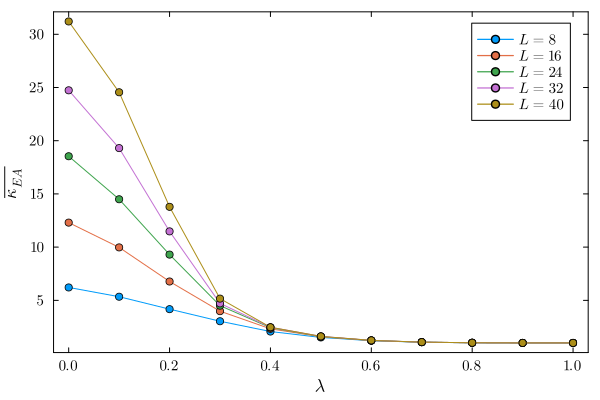

In [104]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:κEA][2L+1] for λ in λs])
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (5:5:30, [L"5", L"10", L"15", L"20", L"25", L"30"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{\kappa_{EA}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

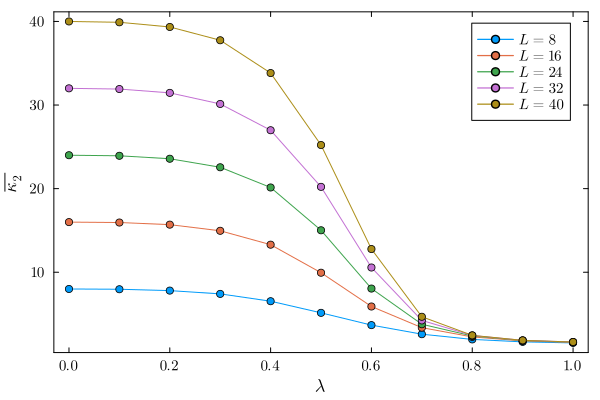

In [101]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:κ2][2L+1] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (10:10:40, [L"10", L"20", L"30", L"40"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{\kappa_{2}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

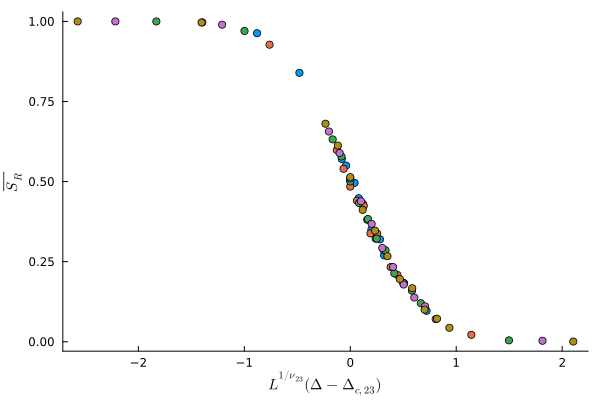

In [146]:
ν = 1.5
λc = 0.72

plt = plot()
for L in 8:8:40
    T = 2L+2
    λs = union(0.5:0.1:0.6,0.7:0.01:0.8, 0.9:0.1:0.9)
    xs = (λs .- λc) * L^(1/ν)
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:SR][2L+1] for λ in λs])
#     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    # xticks = (-4:2:2, [L"-4", L"-2", L"0", L"2"])
    # yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{23}}(\Delta-\Delta_{c,23})", ylabel=L"\overline{S_R}", # title="r=$r",
    # framestyle=:box, xticks=xticks, yticks=yticks,
    grid=false, legend=false, #xlim=(-1,1),
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end
plt

In [123]:
[no_unitary_data[key][3] for key in keys(no_unitary_data) if key[1] == 40 && 0.7 < key[3] < 0.8]

9-element Vector{Int64}:
 1000
 1000
 1000
 1000
 1000
 1000
 1000
 1000
 1000

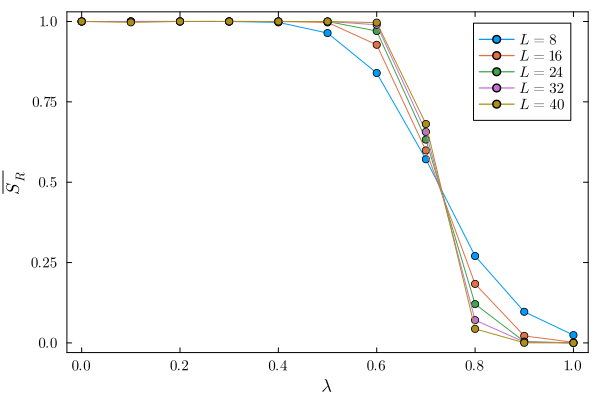

In [160]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:SR][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end

# plot!(p1,inset=bbox(0.22,0.4,0.35,0.35), subplot=2, )

# ν = 2.
# Δc = 0.7
# for L in 8:8:40
#     Δs = 0.0:0.1:1.0
#     xs = (Δs .- Δc) * L^(1/ν)
#     ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:SR],2)[end] for Δ in Δs]
# #     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
#     xticks = (-4:2:2, [L"-4", L"-2", L"0", L"2"])
#     yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
#     plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{23}}(\Delta-\Delta_{c,23})", ylabel=L"\overline{S_R}", # title="r=$r",
#     framestyle=:box, xticks=xticks, yticks=yticks,
#     subplot=2, grid=false, legend=false,
#     xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
# end

# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

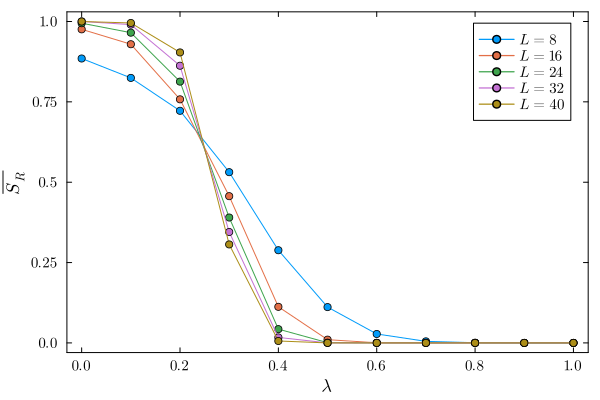

In [161]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:Ic][2L+1] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end

# plot!(p1,inset=bbox(0.22,0.4,0.35,0.35), subplot=2, )

# ν = 2.
# Δc = 0.7
# for L in 8:8:40
#     Δs = 0.0:0.1:1.0
#     xs = (Δs .- Δc) * L^(1/ν)
#     ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:SR],2)[end] for Δ in Δs]
# #     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
#     xticks = (-4:2:2, [L"-4", L"-2", L"0", L"2"])
#     yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
#     plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{23}}(\Delta-\Delta_{c,23})", ylabel=L"\overline{S_R}", # title="r=$r",
#     framestyle=:box, xticks=xticks, yticks=yticks,
#     subplot=2, grid=false, legend=false,
#     xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
# end

# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

In [ ]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:SR][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

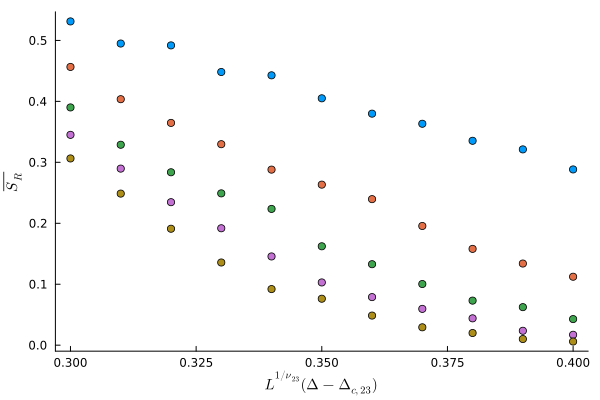

In [156]:
ν = Inf
λc = 0.0

plt = plot()
for L in 8:8:40
    T = 2L+2
    λs = union(0.3:0.01:0.4)
    xs = (λs .- λc) * L^(1/ν)
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:Ic][2L+1] for λ in λs])
#     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    # xticks = (-4:2:2, [L"-4", L"-2", L"0", L"2"])
    # yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{23}}(\Delta-\Delta_{c,23})", ylabel=L"\overline{S_R}", # title="r=$r",
    # framestyle=:box, xticks=xticks, yticks=yticks,
    grid=false, legend=false, #xlim=(-1,1),
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end
plt

In [ ]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    T = 2L + 2
    λs = 0.0:0.1:1.0
    ys = real.([no_unitary_data[(L,T,λ,δ,q,false)][1][:SR][2L] for λ in λs])
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.0", L"0.25", L"0.5", L"0.75", L"1.0"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\lambda", ylabel=L"\overline{S_R}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

In [159]:
L = 8
T = 2L+2

δ = 0.7
q = 0.1

for λ in 0.0:0.01:1.0
    if haskey(no_unitary_data, (L, T, λ, δ, q, false))
        println("lambda=$λ, samples=$(no_unitary_data[(L, T, λ, δ, q, false)][3]))")
    end
    if haskey(no_unitary_data, (L, T, λ, δ, q, true))
        println("lambda=$λ, samples=$(no_unitary_data[(L, T, λ, δ, q, true)][3]))")
    end
end

lambda=0.0, samples=3000)
lambda=0.1, samples=2000)
lambda=0.2, samples=2000)
lambda=0.3, samples=2000)
lambda=0.31, samples=1000)
lambda=0.32, samples=1000)
lambda=0.33, samples=1000)
lambda=0.34, samples=1000)
lambda=0.35, samples=1000)
lambda=0.36, samples=1000)
lambda=0.37, samples=1000)
lambda=0.38, samples=1000)
lambda=0.39, samples=1000)
lambda=0.4, samples=2000)
lambda=0.5, samples=2000)
lambda=0.6, samples=2000)
lambda=0.7, samples=2000)
lambda=0.71, samples=1000)
lambda=0.72, samples=1000)
lambda=0.73, samples=1000)
lambda=0.74, samples=1000)
lambda=0.75, samples=1000)
lambda=0.76, samples=1000)
lambda=0.77, samples=1000)
lambda=0.78, samples=1000)
lambda=0.79, samples=1000)
lambda=0.8, samples=2000)
lambda=0.9, samples=2000)
lambda=1.0, samples=3000)


In [22]:
L = 24
T = 2L+2

δ = 0.7
λ = 0.0

for q in 0.0:0.05:0.5
    println("q=$q, samples=$(no_unitary_data[(L, T, λ, δ, q, false)][3])")
    if haskey(no_unitary_data, (L, T, λ, δ, q, true))
        println("q=$q, samples=$(no_unitary_data[(L, T, λ, δ, q, true)][3]))")
    end
end

q=0.0, samples=2000
q=0.05, samples=2000
q=0.1, samples=3000
q=0.15, samples=1000
q=0.2, samples=1000
q=0.25, samples=700
q=0.3, samples=600
q=0.35, samples=500
q=0.4, samples=1000
q=0.45, samples=1000
q=0.5, samples=1000


In [88]:
data3[(24, 50, 0.2, 0.7, 0.0, 0.1, false)][1][:pure_SR][end-2]

KeyError: KeyError: key (24, 50, 0.2, 0.7, 0.0, 0.1, false) not found

In [70]:
data3[(32, 66, 0.9, 0.7, 0.0, 0.2, true)][1]

Dict{Symbol, Vector{ComplexF64}} with 2 entries:
  :pure_κEA => [32.0+0.0im, 32.0+0.0im, 23.5601-2.7926e-33im, 1.26564-1.21756e-…
  :pure_SR  => [1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 0.99902+0.0im, 0.998811+0.0im,…

In [71]:
data3[(32, 66, 0.9, 0.7, 0.0, 0.2, false)][1]

KeyError: KeyError: key (32, 66, 0.9, 0.7, 0.0, 0.2, false) not found

In [32]:
L = 8
[(key, data1[key][3]) for key in keys(data1) if key[1] == L]

11-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((8, 18, 0.1, 0.7, 0.1), 1000)
 ((8, 18, 1.0, 0.7, 0.1), 1000)
 ((8, 18, 0.2, 0.7, 0.1), 1000)
 ((8, 18, 0.7, 0.7, 0.1), 1000)
 ((8, 18, 0.5, 0.7, 0.1), 1000)
 ((8, 18, 0.3, 0.7, 0.1), 1000)
 ((8, 18, 0.9, 0.7, 0.1), 1000)
 ((8, 18, 0.4, 0.7, 0.1), 1000)
 ((8, 18, 0.6, 0.7, 0.1), 1000)
 ((8, 18, 0.8, 0.7, 0.1), 1000)
 ((8, 18, 0.0, 0.7, 0.1), 1000)

In [ ]:
# missing (q = 0.1, delta = 0.7):
# L = 40, lambda = 0.2, 0.3, 0.6, 40 samples
# L = 32, lambda = 0.8, 50 samples
# L = 24, lambda = 0.3, 200 samples
# L = 24, lambda = 0.9, 100 samples
# L = 16, lambda = 0.1, 100 samples

In [56]:
[(key, data2[key][3]) for key in keys(data2) if key[1] == 24 && key[5] == 0.1 && key[3] < 0.5] 

14-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((24, 50, 0.38, 0.7, 0.1), 1000)
 ((24, 50, 0.2, 0.7, 0.1), 1000)
 ((24, 50, 0.34, 0.7, 0.1), 1000)
 ((24, 50, 0.0, 0.7, 0.1), 2000)
 ((24, 50, 0.36, 0.7, 0.1), 1000)
 ((24, 50, 0.1, 0.7, 0.1), 1000)
 ((24, 50, 0.3, 0.7, 0.1), 1000)
 ((24, 50, 0.39, 0.7, 0.1), 1000)
 ((24, 50, 0.35, 0.7, 0.1), 700)
 ((24, 50, 0.31, 0.7, 0.1), 1000)
 ((24, 50, 0.32, 0.7, 0.1), 1000)
 ((24, 50, 0.4, 0.7, 0.1), 1000)
 ((24, 50, 0.37, 0.7, 0.1), 900)
 ((24, 50, 0.33, 0.7, 0.1), 900)

In [ ]:
# missing (q = 0.1, delta = 0.7):
# L = 40, lambda = 0.35, 40 samples
# L = 32, lambda = 0.39 -- 150
#                  0.35 -- 50
#                  0.31 -- 150
#                  0.33 -- 50
#                  0.38 -- 150
#                  0.34 -- 50
#                  0.36 -- 50
#                  0.71 -- 200
#                  0.74 -- 150
#                  0.78 -- 100
#                  0.72 -- 150
#                  0.73 -- 50
#                  0.75 -- 350
#                  0.76 -- 350
#                  0.77 -- 200
# L = 24, lambda = 0.35 -- 300
#                  0.37 -- 100
#                  0.33 -- 100
#                  0.74 -- 100
#                  0.78 -- 100
#

In [60]:
[(key, data2[key][3]) for key in keys(data2) if key[1] == 40 && key[5] == 0.0] 

11-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((40, 82, 0.2, 0.7, 0.0), 1000)
 ((40, 82, 0.0, 0.7, 0.0), 960)
 ((40, 82, 0.1, 0.7, 0.0), 1000)
 ((40, 82, 1.0, 0.7, 0.0), 1000)
 ((40, 82, 0.3, 0.7, 0.0), 1000)
 ((40, 82, 0.8, 0.7, 0.0), 1000)
 ((40, 82, 0.7, 0.7, 0.0), 1000)
 ((40, 82, 0.5, 0.7, 0.0), 280)
 ((40, 82, 0.4, 0.7, 0.0), 1000)
 ((40, 82, 0.6, 0.7, 0.0), 1000)
 ((40, 82, 0.9, 0.7, 0.0), 1000)

In [ ]:
# missing (can run these PURE!) (q = 0.0, delta = 0.7)
# L = 40 lambda 0.0 -- 40
#               0.5 -- 1000 (just rerun... and maybe keep separate lol)

In [53]:
[(key, data2[key][3]) for key in keys(data2) if key[1] == 40 && key[5] == 0.05] 

11-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((40, 82, 0.7, 0.7, 0.05), 840)
 ((40, 82, 0.5, 0.7, 0.05), 720)
 ((40, 82, 0.4, 0.7, 0.05), 1000)
 ((40, 82, 0.6, 0.7, 0.05), 40)
 ((40, 82, 0.9, 0.7, 0.05), 1000)
 ((40, 82, 0.2, 0.7, 0.05), 1000)
 ((40, 82, 0.0, 0.7, 0.05), 1000)
 ((40, 82, 0.1, 0.7, 0.05), 1000)
 ((40, 82, 1.0, 0.7, 0.05), 1000)
 ((40, 82, 0.3, 0.7, 0.05), 1000)
 ((40, 82, 0.8, 0.7, 0.05), 1000)

In [65]:
[(key, data2[key][3]) for key in keys(data2) if key[1] == 24 && key[3] == 0.0] 

11-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((24, 50, 0.0, 0.7, 0.05), 2000)
 ((24, 50, 0.0, 0.7, 0.35), 500)
 ((24, 50, 0.0, 0.7, 0.2), 1000)
 ((24, 50, 0.0, 0.7, 0.1), 2000)
 ((24, 50, 0.0, 0.7, 0.15), 1000)
 ((24, 50, 0.0, 0.7, 0.4), 1000)
 ((24, 50, 0.0, 0.7, 0.0), 2000)
 ((24, 50, 0.0, 0.7, 0.45), 1000)
 ((24, 50, 0.0, 0.7, 0.3), 600)
 ((24, 50, 0.0, 0.7, 0.5), 1000)
 ((24, 50, 0.0, 0.7, 0.25), 700)

In [55]:
[(key, data2[key][3]) for key in keys(data2) if key[1] == 40 && key[3] == 1.0] 

3-element Vector{Tuple{Tuple{Int64, Int64, Float64, Float64, Float64}, Int64}}:
 ((40, 82, 1.0, 0.7, 0.1), 1000)
 ((40, 82, 1.0, 0.7, 0.0), 1000)
 ((40, 82, 1.0, 0.7, 0.05), 1000)